<a href="https://colab.research.google.com/github/gamagilang/customeranalytics/blob/main/customer_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import pickle

**Import Data**

In [ ]:
! git clone https://github.com/gamagilang/customeranalytics.git

Cloning into 'customeranalytics'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [ ]:
df_segmentation = pd.read_csv('customeranalytics/segmentation data.csv')

**Explore Data**

In [ ]:
df_segmentation.head(5)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


Legend:
Categorical Data 
- Sex:  (0 male, 1 female)
- Matrial status: (0 single, 1 non-single {divorced/seperated/married/widowed})
- Education: (0 other/unknown, 1 High school, 2 university, 3 graduate school)
- Occupation: (1 unemployed/unskilled, 1 skilled employee/official, 2 management/staf-employed/highly qualified employee/officer
- Settlement size: (0 small city, 1 mid-size city, 2 big city

In [ ]:
df_segmentation.Occupation.value_counts()

1    1113
0     633
2     254
Name: Occupation, dtype: int64

In [ ]:
df_segmentation.Education.value_counts()

1    1386
2     291
0     287
3      36
Name: Education, dtype: int64

In [ ]:
df_segmentation.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


Note: The mean for categorical variable is meaningless especially for the above 2 categorical data

**Correlation**

In [ ]:
df_segmentation = df_segmentation.reset_index(level = 0, drop = True).drop(columns = 'ID', axis = 1)
df_segmentation.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


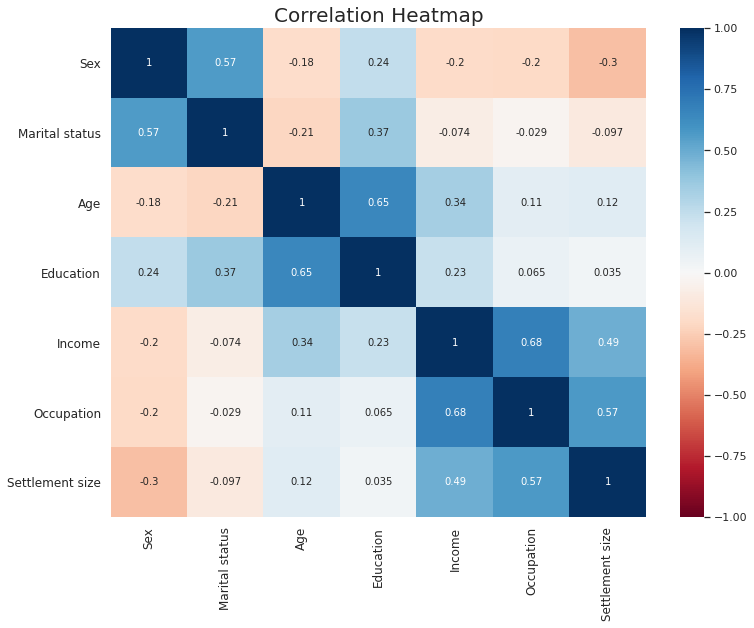

In [ ]:
plt.figure(figsize=(12,9))
s = sns.heatmap(df_segmentation.corr(), annot= True, cmap = 'RdBu', vmin = -1, vmax=1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap', fontsize = 20)
plt.show()

Note: 
- Strong Correlation between age and education
- Strong Correlation between Occupation and Income

Visualize Raw Data

Text(0.5, 1.0, 'Age Vs Income Visualization')

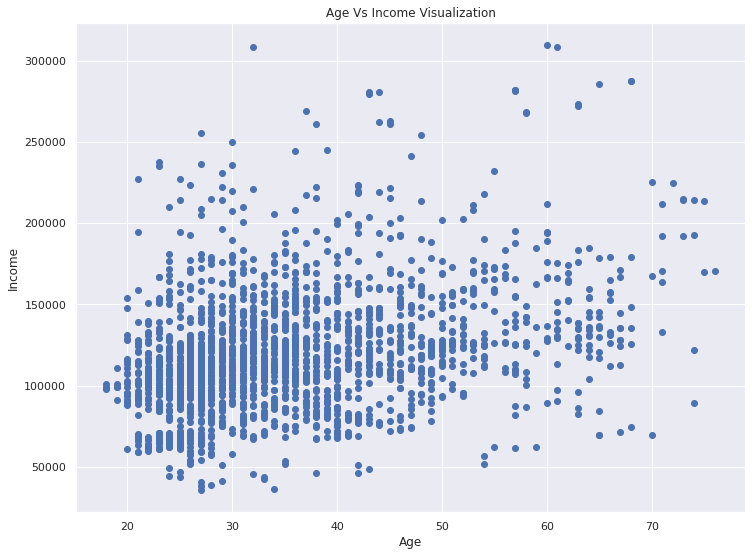

In [ ]:
plt.figure(figsize=(12, 9))
plt.scatter(df_segmentation.iloc[:,2], df_segmentation.iloc[:,4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age Vs Income Visualization')

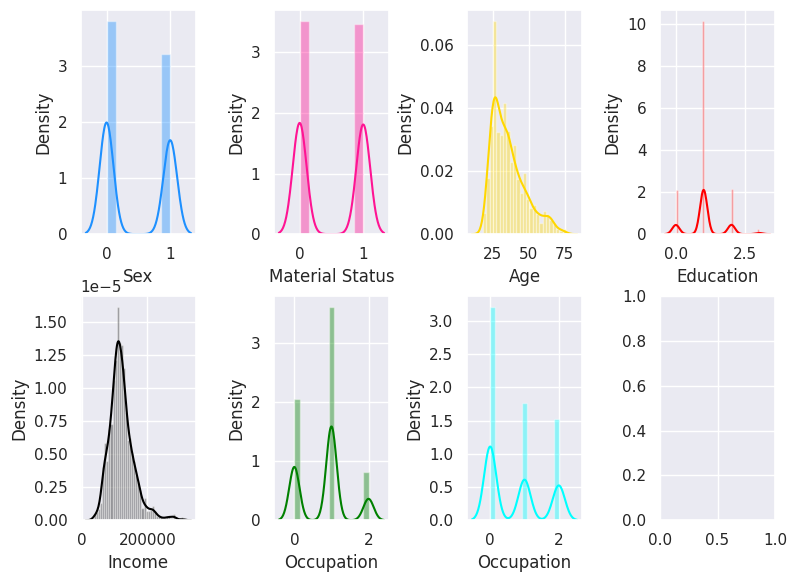

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(8, 6), dpi=100)
fig.tight_layout(pad=2.0)
sns.distplot(df_segmentation.iloc[:,0] , color="dodgerblue", ax=axes[0,0], axlabel='Sex')
sns.distplot(df_segmentation.iloc[:,1] , color="deeppink", ax=axes[0,1], axlabel='Material Status')
sns.distplot(df_segmentation.iloc[:,2] , color="gold", ax=axes[0,2], axlabel='Age')
sns.distplot(df_segmentation.iloc[:,3] , color="red", ax=axes[0,3], axlabel='Education')
sns.distplot(df_segmentation.iloc[:,4] , color="black", ax=axes[1,0], axlabel='Income')
sns.distplot(df_segmentation.iloc[:,5] , color="green", ax=axes[1,1], axlabel='Occupation')
sns.distplot(df_segmentation.iloc[:,6] , color="cyan", ax=axes[1,2], axlabel='Occupation')


Note: We can see that the numerical feature such as Age and Income are almost normally distributed. Although there is still skewness indication, here we are going to put away these consideration first. 

**Standardization**

In [ ]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation)

In [ ]:
segmentation_std

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

**K-menas Clustering**

In [ ]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i,init = 'k-means++', random_state=43)
  kmeans.fit(segmentation_std)
  wcss.append(kmeans.inertia_) 

Text(0.5, 1.0, 'K-means Clustering')

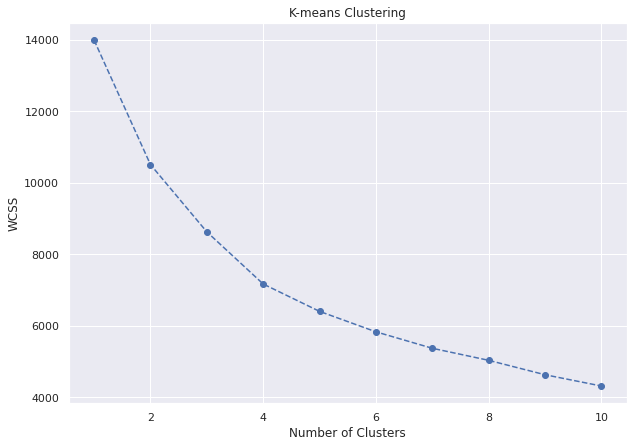

In [ ]:
plt.figure(figsize = (10,7))
plt.plot(range(1,11),wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state=42)
kmeans.fit(segmentation_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

**Result**

In [ ]:
df_segmentation_kmeans = df_segmentation.copy()
df_segmentation_kmeans['Segment K-means'] = kmeans.labels_
df_segmentation_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means
0,0,0,67,2,124670,1,2,0
1,1,1,22,1,150773,1,2,3
2,0,0,49,1,89210,0,0,1
3,0,0,45,1,171565,1,1,2
4,0,0,53,1,149031,1,1,2


In [ ]:
df_segmentation_analysis = df_segmentation_kmeans.groupby(['Segment K-means']).mean()
df_segmentation_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695


Note: 

In segment 0: 
- the man and women are euqaly distributed
- avg age of 55 (oldest)
- more than 2/3 are in relationship
- have the highest level of education
---> conclusion: this segment may called as well-off people

In segment 1:
- 2/5 are male
- avg age is 35
- education low on average compared to other
- low income compared to other
- live in small city
---> conclusion: this segment may be called as a fewer-opportunities

In segment 3:
- 80% are female
- avg age of 29
- 99% are in relationship
- medium level of education
- income are average 
- live between small,mid-size, and big cities. 
---> conclusion: About average on every segment. This segment called as standard

In segment 2:
- 99% are male
- less than 20% are in relationship
- relatively low education background
- High income
- The majority live on big or middle cities
---> conclusion: This segment called as career-focused




In [ ]:
df_segmentation_analysis['N Obs']= df_segmentation_kmeans[['Segment K-means','Sex']].groupby(['Segment K-means']).count()
df_segmentation_analysis['Prop Obs'] = df_segmentation_analysis['N Obs'] / df_segmentation_analysis['N Obs'].sum()
df_segmentation_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525


In [ ]:
df_segmentation_analysis.rename({0:'well-off',1:'fewer-opportunities',2:'career-focused',3:'standard'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
well-off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
fewer-opportunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
career-focused,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525


In [ ]:
df_segmentation_kmeans['Labels'] = df_segmentation_kmeans['Segment K-means'].map({0:'well-off',1:'fewer-opportunities',2:'career-focused',3:'standard'})
df_segmentation_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means,Labels
0,0,0,67,2,124670,1,2,0,well-off
1,1,1,22,1,150773,1,2,3,standard
2,0,0,49,1,89210,0,0,1,fewer-opportunities
3,0,0,45,1,171565,1,1,2,career-focused
4,0,0,53,1,149031,1,1,2,career-focused
...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,1,fewer-opportunities
1996,1,1,27,1,117744,1,0,3,standard
1997,0,0,31,0,86400,0,0,1,fewer-opportunities
1998,1,1,24,1,97968,0,0,3,standard


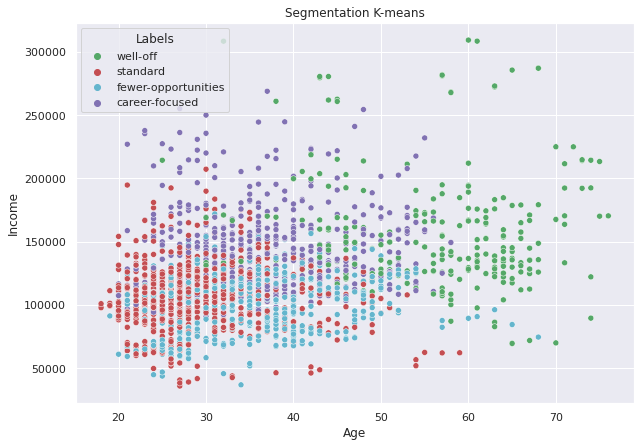

In [ ]:
x_axis = df_segmentation_kmeans['Age']
y_axis = df_segmentation_kmeans['Income']
plt.figure(figsize=(10,7))
sns.scatterplot(x_axis,y_axis, hue = df_segmentation_kmeans['Labels'], palette = ['g','r','c','m'])
plt.title('Segmentation K-means')
plt.show()

Note:

- we can observe the green segment (well-off) is clearly separeted in the highest value in both axes
- the career-focused is segmented only on the higest value in Income axes but there are few observation which are grouped with the other segment
- The standard and fewer opportunities segment are grouped together yet it's harder to get more insight.

conclusion: the k-menas can make a decent segmentation but the result is far from perfect

**PCA**

In [ ]:
segmentation_std

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

In [ ]:
pca = PCA()
pca.fit(segmentation_std)
eigenvalues = pca.explained_variance_
var_ratio = pca.explained_variance_ratio_

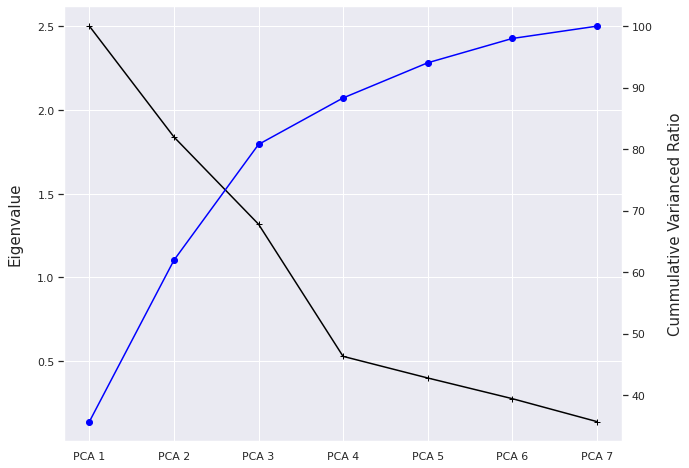

In [ ]:
def biplot(x,y):
  #x = eigenvalues
  #y = var_ratio
  index = np.arange(len(x))
  subject=('PCA 1','PCA 2','PCA 3','PCA 4','PCA 5','PCA 6','PCA 7')
  fig, ax = plt.subplots(figsize = (10,8))
  ax.plot(x ,color='black', marker = '+')
  ax2 = ax.twinx()
  ax2.plot(y.cumsum()*100, color = 'blue', marker = 'o')
  ax.set_ylabel('Eigenvalue', fontsize = 15, labelpad = 15)
  ax2.set_ylabel('Cummulative Varianced Ratio', fontsize = 15, labelpad = 15)
  plt.xticks(index,subject)
  plt.grid()
biplot(eigenvalues,var_ratio)

In [ ]:
pca =PCA(n_components = 3)
pca.fit(segmentation_std)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

**Result**

In [ ]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [ ]:
df_pca_component = pd.DataFrame(pca.components_, columns = df_segmentation.columns, index=['PCA 1', 'PCA 2', 'PCA 3'])
df_pca_component

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
PCA 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
PCA 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
PCA 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


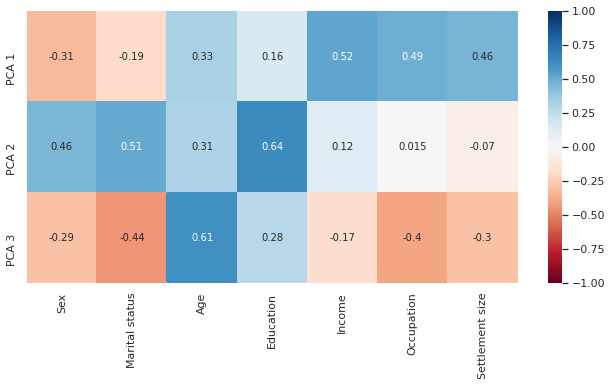

In [ ]:
plt.figure(figsize=(11,5))
sns.heatmap(df_pca_component,vmin = -1, vmax=1, cmap = 'RdBu', annot = True)

Note:
- the carrer-related features such as 'Age','Income', 'Occupation','Settlement Size' are explained in PCA 1
- the Sex, material status, and education are the most prominent determinants. PCA 2 refer to individual education and lifestyle 
- PCA 3 are consist of individual who has no matter if work experience or life experience. It is because there are strong correlation between age, material status (lifestyle) and occupation, settlement size (career-experience)


In [ ]:
pca.transform(segmentation_std)
scores_pca = pca.transform(segmentation_std)

**Result: Observe how the original data related to the third PCs**

In [ ]:
wcss_pca = []
for i in range(1,11):
  kmeans_pca = KMeans(n_clusters = i,init = 'k-means++', random_state=43)
  kmeans_pca.fit(scores_pca)
  wcss_pca.append(kmeans_pca.inertia_)  
wcss_pca

[11307.571135945922,
 7831.380788178496,
 5954.294544612054,
 4543.114849265297,
 3835.283231979764,
 3317.456156606616,
 2871.3786367722723,
 2588.7727684582496,
 2304.5349132344,
 2009.5179566557085]

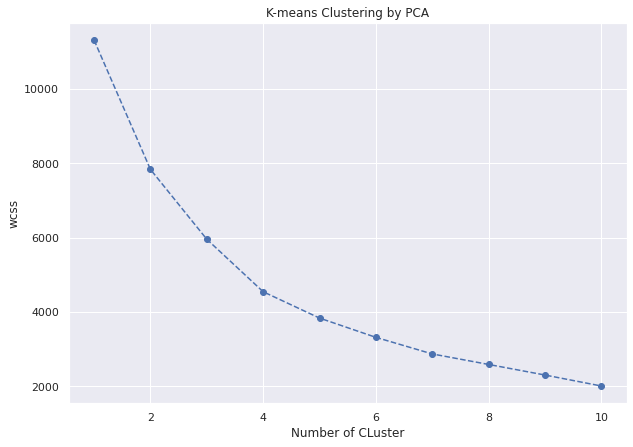

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(range(1,11), wcss_pca, marker = 'o', linestyle = '--')
plt.xlabel('Number of CLuster')
plt.ylabel('wcss')
plt.title('K-means Clustering by PCA')
plt.show()

In [ ]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans_pca.fit(scores_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
kmeans_pca.labels_

array([0, 2, 1, ..., 1, 2, 1], dtype=int32)

**K-means clustering with PCA Results**

In [ ]:
df_segmentation_pca_kmeans = pd.concat([df_segmentation.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segmentation_pca_kmeans.columns.values[-3:] = ['PCA 1', 'PCA 2','PCA 3']
df_segmentation_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
df_segmentation_pca_kmeans.head(5)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,PCA 1,PCA 2,PCA 3,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,0
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,2
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,1
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,3
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,3


In [ ]:
df_segmentation_pca_kmeans_freq = df_segmentation_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segmentation_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,PCA 1,PCA 2,PCA 3
Segment K-means PCA,,,,,,,,,,
0,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,1.697646,2.029427,0.841953
1,0.305011,0.095861,35.315904,0.760349,93633.372549,0.250545,0.039216,-1.047610,-0.904856,1.005493
2,0.900576,0.963977,28.920749,1.061960,107571.126801,0.677233,0.439481,-1.106034,0.705300,-0.776925
3,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046


In [ ]:
df_segmentation_pca_kmeans_freq['N Obs'] = df_segmentation_pca_kmeans[['Segment K-means PCA','Sex']].groupby(['Segment K-means PCA']).count()
df_segmentation_pca_kmeans_freq['Prob Obs'] = df_segmentation_pca_kmeans_freq['N Obs']/df_segmentation_pca_kmeans_freq['N Obs'].sum()
df_segmentation_pca_kmeans_freq = df_segmentation_pca_kmeans_freq.rename({0:'well-off',1:'fewer-opportunities',2:'standard',3:'career-focused'})
df_segmentation_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,PCA 1,PCA 2,PCA 3,N Obs,Prob Obs
Segment K-means PCA,,,,,,,,,,,,
well-off,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,1.697646,2.029427,0.841953,264,0.1320
fewer-opportunities,0.305011,0.095861,35.315904,0.760349,93633.372549,0.250545,0.039216,-1.047610,-0.904856,1.005493,459,0.2295
standard,0.900576,0.963977,28.920749,1.061960,107571.126801,0.677233,0.439481,-1.106034,0.705300,-0.776925,694,0.3470
career-focused,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915


Note: 
- The highest segment is belongs to standard with 694 the total number of customer
- The well-off segment consist of 13% of the total number of customer wich is the lowest segment among other
- the career focused also considered as a high segement with the number of people around 583 

In [ ]:
df_segmentation_pca_kmeans['Legend']=df_segmentation_pca_kmeans['Segment K-means PCA'].map({0:'well-off',1:'fewer-opportunities',2:'standard',3:'career-focused'})

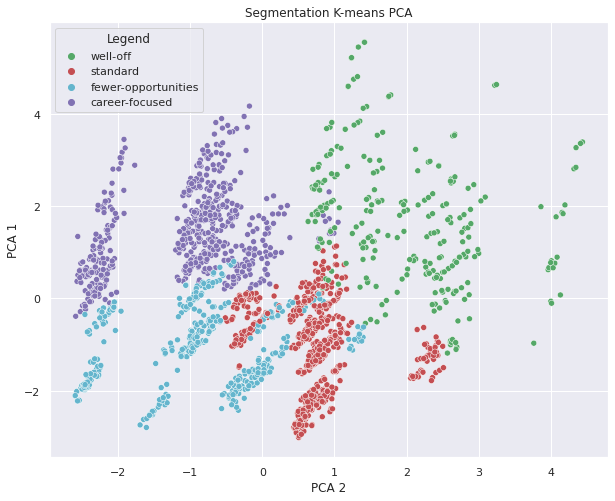

In [ ]:
# plotting the K-means clustering with PCA

x_axis = df_segmentation_pca_kmeans['PCA 2']
y_axis = df_segmentation_pca_kmeans['PCA 1']

plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue = df_segmentation_pca_kmeans['Legend'], palette = ['g','r','c','m'])
plt.title('Segmentation K-means PCA')
plt.show()

Note:
- there are still overlap between the standard and the fewer-opportunities segment
- but as a whole all four segment are seperated. 
- The overlap part is determined by the third principal component
conclusion: 
- we only need 3 component to seperate the data
- the two dimensional plot is enough to visually see the separation


**Data Export**

In [ ]:
pickle.dump(scaler,open('scaler.pickle', 'wb'))
pickle.dump(pca, open('pca.pickle','wb'))
pickle.dump(kmeans_pca,open('kmeans_pca.pickle','wb'))